## Немного теории

Временной ряд -  это последовательность наблюдений, упорядоченных во времени (или пространстве)

Данные временных рядов можно анализировать для извлечения значимой статистики и других характеристик. Он используется по крайней мере в 4 сценариях:

а) Бизнес-прогнозирование

б) понять прошлое поведение

в) планировать будущее

г) оценить текущее достижение

Нам не нужно применять временные ряды по крайней мере в следующих 2 случаях:

а) Зависимая переменная (у) (которая должна меняться со временем) постоянна. Пример: y=f(x)=4, линия, параллельная оси x(время), всегда будет оставаться неизменной.

б) Зависимая переменная (y) представляет значения, которые можно обозначить как математическую функцию. Уравнение: sin(x), log(x), полиномы и т. д. Таким образом, мы можем напрямую получить значение в какой-то момент, используя саму функцию. Нет необходимости в прогнозировании.

## Импорты

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from pylab import rcParams
from statsmodels.tsa.arima_model import ARIMA
from prophet import Prophet
from prophet.plot import plot_plotly
import plotly.offline as py
from pyparsing import identbodychars
import matplotlib.pyplot as plt

In [ ]:
import warnings
warnings.simplefilter(action = 'ignore', category = Warning)
 

In [ ]:
df = pd.read_csv('AirPassengers.csv')
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


Будем иметь дело с двумя столбцами, один из которых является временным,в данном случае месяц, а другой - прогнозируемое значение - пассажиры самолетов. Чтобы упростить построение графиков, мы устанавливаем индекс фрейма данных pandas на месяц. Во время построения индекс будет действовать по умолчанию как ось X, и поскольку он имеет только еще 1 столбец, он будет автоматически принят за ось Y.

In [ ]:
df['Month'] = pd.to_datetime(df['Month'],infer_datetime_format=True)
indexedDataset = df.set_index(['Month'])
indexedDataset.head(5)

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


Построим график

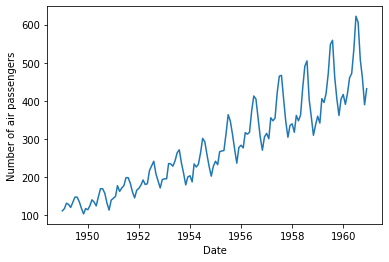

In [ ]:
plt.xlabel('Date')
plt.ylabel('Number of air passengers')
plt.plot(indexedDataset)

## Изменение шага временного ряда и сдвиг

#### Изменение шага временного ряда

In [ ]:
#код здесь

,#Passengers
Month,
1949-01-01,126.666667
1950-01-01,139.666667
1951-01-01,170.166667
1952-01-01,197.000000
1953-01-01,225.000000


#### Сдвиг временного ряда

In [ ]:
#код здесь

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,112.0
1949-04-01,118.0
1949-05-01,132.0


## Компоненты временного ряда



1.   Тренд - постоянное восходящее и нисходящее движение данных во времени в течение большого периода времени, например, отношение йены к доллару
2.   Сезонность -  циклические изменения уровня ряда с постоянным периодом.
3.   Шум - отличающиеся данные в рандомный момент, которые нельзя прогнозировать.
4.   Цикличность - поведение, которое повторяется на протяжении большого интервала времени.



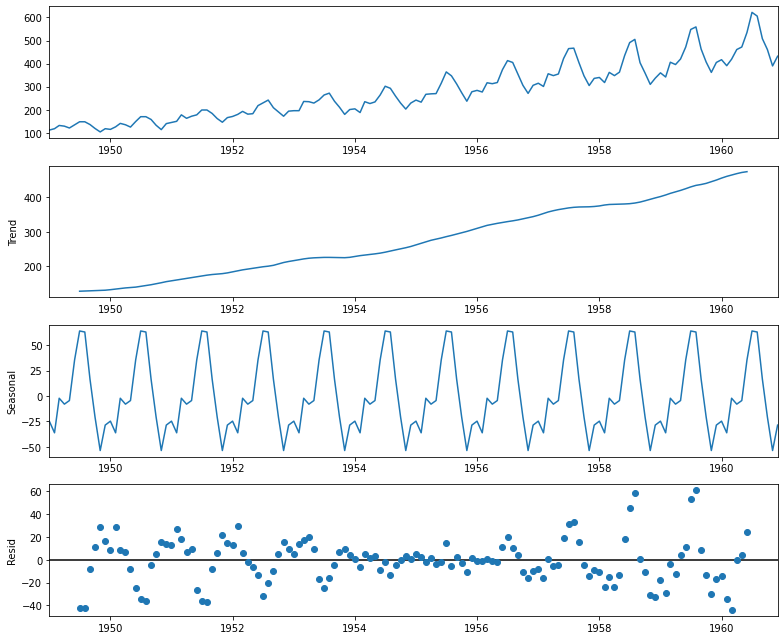

In [ ]:
rcParams['figure.figsize'] = 11, 9
 
# применяем функцию к данным о перевозках
decompose = seasonal_decompose(indexedDataset)
decompose.plot()
 
plt.show()

## Что такое стационарность и зачем она нужна

Одномерный временной ряд называется стационарным, если его вероятностные характеристики (параметры случайной величины) постоянны, то есть, отсутствует тренд и сезонность. Временной ряд называется нестационарным, если хотя бы одна из вероятностных характеристик непостоянна, то есть, есть тренд или сезонность

Временной ряд должен быть стационарным по следующим причинам:

а) Если временной ряд ведет себя определенным образом на временном интервале, то существует высокая вероятность того, что на другом интервале она будет вести себя так же, при условии, что временной ряд является стационарным. Это помогает точно прогнозировать.

б) Теории и математические формулы  легче применять для стационарных временных рядов

Способы проверки ряда на стационарность:
1. Rolling Statistics
2. ADCF test

#### RollingStatistics

In [1]:
#код здесь

#### ADCF test

In [2]:
#код здесь

#### Как добиться стационарности?

Есть несколько способов добиться стационарности посредством преобразования данных, например, взять log10, квадрат, квадратный корень, куб, кубический корень, экспоненциальное затухание, сдвиг во времени и так далее...


### Кореляция и автокореляция

Корреляция показывает силу взаимосвязи двух переменных.
Автокорреляция также показывает степень взаимосвязи в диапазоне от –1 до 1, но только не двух переменных, а одной и той же переменной в разные моменты времени.

### Модели

#### ARIMA

Авторегрессионное интегрированное скользящее среднее (autoregressive integrated moving average, ARIMA) является обобщением модели авторегрессионного скользящего среднего. Эти модели используются при работе с временными рядами для более глубокого понимания данных или предсказания будущих точек ряда. Обычно модель упоминается, как ARIMA(p,d,q), где p,d и q — целые неотрицательные числа, характеризующие порядок для частей модели (соответственно авторегрессионной, интегрированной и скользящего среднего).

#### Prophet


Согласно статье Facebook Prophet, был разработан для прогнозирования большого числа различных бизнес-показателей и строит достаточно хорошие default'ные прогнозы. Кроме того, библиотека дает возможность, изменяя человеко-понятные параметры, улучшать прогноз и не требует от аналитиков глубоких знаний устройства предсказательных моделей.


Давайте немного обсудим, как же работает библиотека Prophet. По сути, это additive regression model, состоящая из следующих компонент:


$y(t) = g(t) + s(t) + h(t) + \epsilon_{t}$


Сезонные компоненты $s(t)$ отвечают за моделирование периодических изменений, связанных с недельной и годовой сезонностью. Недельная сезонность моделируется с помощью dummy variables. Добавляются 6 дополнительных признаков, например, [monday, tuesday, wednesday, thursday, friday, saturday], которые принимают значения 0 и 1 в зависимости от даты. Признак sunday, соответствующий седьмому дню недели, не добавляют, потому что он будут линейно зависеть от других дней недели и это будет влиять на модель.
Годовая же сезонность моделируется рядами Фурье.
Тренд $g(t)$ — это кусочно-линейная или логистическая функция. С линейной функцией все понятно. Логистическая же функция вида $g(t) = \frac{C}{1+exp(-k(t-b))}$ позволяет моделировать рост с насыщением, когда при увеличении показателя снижается темп его роста. Типичный пример — это рост аудитории приложения или сайта.
Кроме всего прочего, библиотека умеет по историческим данным выбирать оптимальные точки изменения тренда. Но их также можно задать и вручную (например, если известны даты релизов новой функциональности, которые сильно повлияли на ключевые показатели).
Компонента $h(t)$ отвечает за заданные пользователем аномальные дни, в том числе и нерегулярные, такие как, например, Black Fridays.
Ошибка $\epsilon_{t}$ содержит информацию, которая не учтена моделью.
